# 1. Importing and Cleaning the Datasets

In [1]:
# Import the libraries

import numpy as np
import pandas as pd

## a) FIFA Ranking Dataset

In [2]:
# Import the fifa_ranking dataset

fifa_ranking = pd.read_csv('/content/fifa_ranking.csv')

# preview the dataset

fifa_ranking.head(3)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08


In [3]:
# Check the shape of the dataset

fifa_ranking.shape

# There are too many countries (57,793)

(57793, 16)

In [4]:
# Check the unique entries in the country_full column

(print('There are ' + str(fifa_ranking['country_full']. nunique()) + ' unique countries in our dataframe'))

# The unique countries don't tally with the 57,756 rows in our dataframe. Therefore, check the unique dates
# in our rank date column in our dataframe.

(print('There are ' + str(fifa_ranking['rank_date']. nunique()) + ' unique dates in our dataframe'))

print('*'*70) #print a separator

print('Earliest Ranking Date: ' + fifa_ranking['rank_date'].min()) 

print('Latest Ranking Date: ' + fifa_ranking['rank_date'].max()) # Check the latest date we have in re;ation to the rankings

# With 286 different rank dates, it makes sense why we have so many rows. If each of the 216 countries was to have been ranked
# 286 times, we would have had 61,176 rows. With 57,756 rows, it seems that there was some attrition during these two dates
# (As of January 2021, there were 195 countries recognized by the UN).


There are 216 unique countries in our dataframe
There are 286 unique dates in our dataframe
**********************************************************************
Earliest Ranking Date: 1993-08-08
Latest Ranking Date: 2018-06-07


In [5]:
# Check for null values

fifa_ranking.isnull().sum()

# No null values

rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
dtype: int64

In [6]:
# check for duplicates and drop them. These need to be dropped before we drop the "rank_date" column so as to avoid sitiations 
# where we incorrectly drop columns as duplicates when they are not really duplicates.

fifa_ranking = fifa_ranking.drop_duplicates()

# print the shape of the new dataset

fifa_ranking.shape # dropped 37 duplicate rows

(57756, 16)

In [7]:
# Drop unnecessary columns

fifa_ranking = fifa_ranking.drop(['total_points', 'previous_points', 'rank_change', 'cur_year_avg', 'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted', 'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg', 'three_year_ago_weighted'], axis = 1)

In [8]:
fifa_ranking.head(2)

,rank,country_full,country_abrv,confederation,rank_date
0,1,Germany,GER,UEFA,1993-08-08
1,2,Italy,ITA,UEFA,1993-08-08


In [9]:
# Describe the data

print(fifa_ranking.describe())

print('*'*70)

print(fifa_ranking.dtypes)

print('*'*70)

print(fifa_ranking.shape)

               rank
count  57756.000000
mean     101.618118
std       58.635096
min        1.000000
25%       51.000000
50%      101.000000
75%      152.000000
max      209.000000
**********************************************************************
rank              int64
country_full     object
country_abrv     object
confederation    object
rank_date        object
dtype: object
**********************************************************************
(57756, 5)


In [10]:
# change the rank_date column from object to date_time data type

import datetime # import the library

fifa_ranking["rank_date"] = fifa_ranking["rank_date"].apply(pd.to_datetime) # change the column datatype

print(fifa_ranking.dtypes) # check that the dataype conversion has been done correctly

rank                      int64
country_full             object
country_abrv             object
confederation            object
rank_date        datetime64[ns]
dtype: object


In [11]:
# preview the data

fifa_ranking.head(3)

,rank,country_full,country_abrv,confederation,rank_date
0,1,Germany,GER,UEFA,1993-08-08
1,2,Italy,ITA,UEFA,1993-08-08
2,3,Switzerland,SUI,UEFA,1993-08-08


## b) Results Dataset

In [12]:
# Import the results dataset

results = pd.read_csv('/content/results.csv')

# preview the dataset

results.head(3)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False


In [13]:
# Check the shape of the dataset

results.shape

(40839, 9)

In [14]:
# check whether there are any null values

results.isnull().sum()

# there are no null values

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

In [15]:
# drop duplicates

results = results.drop_duplicates()

# check the new shape

results.shape

# there are no duplicates in our data

(40839, 9)

In [16]:
# check the unique values under the column tournament
print(results['tournament'].nunique())

print('*'*70)

print(results['tournament'].unique())

# there are 109 unique values as shown. this is important because our learning model will train using 3 tournament types,
# world cup, friendly and other

109
**********************************************************************
['Friendly' 'British Championship' 'Copa Lipton' 'Copa Newton'
 'Copa Premio Honor Argentino' 'Copa Premio Honor Uruguayo' 'Copa Roca'
 'Copa América' 'Copa Chevallier Boutell' 'Nordic Championship'
 'International Cup' 'Baltic Cup' 'Balkan Cup' 'FIFA World Cup'
 'Copa Rio Branco' 'FIFA World Cup qualification' 'CCCF Championship'
 'NAFU Championship' 'Copa Oswaldo Cruz' 'Pan American Championship'
 'Copa del Pacífico' "Copa Bernardo O'Higgins"
 'AFC Asian Cup qualification' 'Atlantic Cup' 'AFC Asian Cup'
 'African Cup of Nations' 'Copa Paz del Chaco' 'Merdeka Tournament'
 'UEFA Euro qualification' 'UEFA Euro' 'Windward Islands Tournament'
 'African Cup of Nations qualification' 'Vietnam Independence Cup'
 'Copa Carlos Dittborn' 'CONCACAF Championship' 'Copa Juan Pinto Durán'
 'UAFA Cup' 'South Pacific Games' 'CONCACAF Championship qualification'
 'Copa Artigas' 'GaNEFo' "King's Cup" 'Gulf Cup' 'Indonesia Tourna

In [17]:
# check the column data types

results.dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object

In [18]:
print('Earliest Playing Date: ' + str(results['date'].min()))

print('Latest Ranking Date: ' + str(results['date'].max()))

Earliest Playing Date: 1872-11-30
Latest Ranking Date: 2019-07-20


In [19]:
# drop unnecessary columns

results = results.drop(['city', 'country', 'neutral'], 1)

In [20]:
# change the rank_date column from object to date_time data type

import datetime # import the library

results["date"] = results["date"].apply(pd.to_datetime) # change the column datatype

print(results.dtypes) # check that the dataype conversion has been done correctly

date          datetime64[ns]
home_team             object
away_team             object
home_score             int64
away_score             int64
tournament            object
dtype: object


In [21]:
# preview the data

results.head(3)

,date,home_team,away_team,home_score,away_score,tournament
0,1872-11-30,Scotland,England,0,0,Friendly
1,1873-03-08,England,Scotland,4,2,Friendly
2,1874-03-07,Scotland,England,2,1,Friendly


# 2. Merging the two datasets

## a) Merge based on the home_team

In [22]:
# check the first two rows and the shape of the results dataset

print(results.head(2))
print('*'*70)
print(results.shape)

        date home_team away_team  home_score  away_score tournament
0 1872-11-30  Scotland   England           0           0   Friendly
1 1873-03-08   England  Scotland           4           2   Friendly
**********************************************************************
(40839, 6)


In [23]:
# check the first two rows and the shape of the fifa_ranking dataset

print(fifa_ranking.head(2))
print("*"*70)
print(fifa_ranking.shape)

   rank country_full country_abrv confederation  rank_date
0     1      Germany          GER          UEFA 1993-08-08
1     2        Italy          ITA          UEFA 1993-08-08
**********************************************************************
(57756, 5)


In [24]:
# merge the results dataset and the fifa_rankings dataset based on the results home_team column. This will help to populate the
# home teams rank in the combined dataset (home_team) as shown below

home_team = pd.merge(results, fifa_ranking,left_on=['home_team'],right_on=['country_full'], how='left')
home_team.head(3)

# The rank of the home team has been apportioned based on the home teams rank on the rank_date column of the fifa_ranking dataset

,date,home_team,away_team,home_score,away_score,tournament,rank,country_full,country_abrv,confederation,rank_date
0,1872-11-30,Scotland,England,0,0,Friendly,30.0,Scotland,SCO,UEFA,1993-08-08
1,1872-11-30,Scotland,England,0,0,Friendly,28.0,Scotland,SCO,UEFA,1993-09-23
2,1872-11-30,Scotland,England,0,0,Friendly,29.0,Scotland,SCO,UEFA,1993-10-22


In [25]:
# check on the shape of our new home_team dataset. It shows that we have 10,273,115 rows. This is due to thye duplication that 
# occured during the merging process.

home_team.shape

(10273115, 11)

In [26]:
# dstart cleaning to remove duplicates. We can remove some duplicates by specifying that the date that the game was played should
# be less than the rank date. This ensures that the home team is assigned it's proper rank based on when the ranking was carried out
 
home_team = home_team[home_team.date <= home_team.rank_date]

In [27]:
# Check how many rows have been dropped

home_team.shape

(7276872, 11)

In [28]:
# drop further duplicates by specifying the subsets of columns to be used to identify the duplicates

home_team = home_team.drop_duplicates(subset=['date', 'home_team', 'away_team','home_score','away_score','tournament', 'confederation'], keep='first')

In [29]:
# rename the rank column

home_team.rename(columns={'rank':'home_team_rank'}, inplace=True)

In [30]:
# check the shape of our cleaned dataset

home_team.shape

(35659, 11)

In [31]:
# preview the first two rows of our cleaned home_team dataset. We have now merged the two datasets (fifa_rankings and results) and 
# picked the rank for the home team

home_team.head(2)

,date,home_team,away_team,home_score,away_score,tournament,home_team_rank,country_full,country_abrv,confederation,rank_date
0,1872-11-30,Scotland,England,0,0,Friendly,30.0,Scotland,SCO,UEFA,1993-08-08
286,1873-03-08,England,Scotland,4,2,Friendly,11.0,England,ENG,UEFA,1993-08-08


## b) Merge based on the away_team

In [32]:
# merge the results dataset and the fifa_rankings dataset based on the results away_team column. This will help to populate the
# away teams rank in the combined dataset (away_team) as shown below

away_team = pd.merge(results, fifa_ranking,left_on=['away_team'],right_on=['country_full'], how='left')

away_team.head(3)

# The rank of the away team has been apportioned based on the home teams rank on the rank_date column of the fifa_ranking dataset

,date,home_team,away_team,home_score,away_score,tournament,rank,country_full,country_abrv,confederation,rank_date
0,1872-11-30,Scotland,England,0,0,Friendly,11.0,England,ENG,UEFA,1993-08-08
1,1872-11-30,Scotland,England,0,0,Friendly,5.0,England,ENG,UEFA,1993-09-23
2,1872-11-30,Scotland,England,0,0,Friendly,10.0,England,ENG,UEFA,1993-10-22


In [33]:
# check on the shape of our new home_team dataset. It shows that we have 10,195,473 rows. This is due to thye duplication that 
# occured during the merging process.

away_team.shape

(10195473, 11)

In [34]:
# start cleaning to remove duplicates. We can remove some duplicates by specifying that the date that the game was played should
# be less than the rank date. This ensures that the away team is assigned it's proper rank based on when the ranking was carried out
 
away_team = away_team[away_team.date <= away_team.rank_date]

In [35]:
# Check how many rows have been dropped

away_team.shape

(7224733, 11)

In [36]:
# drop further duplicates by specifying the subsets of columns to be used to identify the duplicates

away_team = away_team.drop_duplicates(subset=['date', 'home_team', 'away_team','home_score','away_score','tournament', 'confederation'], keep='first')

In [37]:
# check the shape of our cleaned dataset

away_team.shape

(35489, 11)

In [38]:
# rename the rank column

away_team.rename(columns={'rank':'away_team_rank'}, inplace=True)

In [39]:
# preview the first two rows of our cleaned home_team dataset. We have now merged the two datasets (fifa_rankings and results) and 
# picked the rank for the home team

away_team.head(2)

,date,home_team,away_team,home_score,away_score,tournament,away_team_rank,country_full,country_abrv,confederation,rank_date
0,1872-11-30,Scotland,England,0,0,Friendly,11.0,England,ENG,UEFA,1993-08-08
286,1873-03-08,England,Scotland,4,2,Friendly,30.0,Scotland,SCO,UEFA,1993-08-08


## c) Merge the away team and home team datasets

In [40]:
combined_dataset = pd.merge(away_team, home_team,left_on=['date'],right_on=['date'], how='left')

combined_dataset.head(3)

,date,home_team_x,away_team_x,home_score_x,away_score_x,tournament_x,away_team_rank,country_full_x,country_abrv_x,confederation_x,rank_date_x,home_team_y,away_team_y,home_score_y,away_score_y,tournament_y,home_team_rank,country_full_y,country_abrv_y,confederation_y,rank_date_y
0,1872-11-30,Scotland,England,0,0,Friendly,11.0,England,ENG,UEFA,1993-08-08,Scotland,England,0.0,0.0,Friendly,30.0,Scotland,SCO,UEFA,1993-08-08
1,1873-03-08,England,Scotland,4,2,Friendly,30.0,Scotland,SCO,UEFA,1993-08-08,England,Scotland,4.0,2.0,Friendly,11.0,England,ENG,UEFA,1993-08-08
2,1874-03-07,Scotland,England,2,1,Friendly,11.0,England,ENG,UEFA,1993-08-08,Scotland,England,2.0,1.0,Friendly,30.0,Scotland,SCO,UEFA,1993-08-08


In [41]:
# drop duplicate and unnecessary columns

combined_dataset = combined_dataset.drop(['home_team_y', 'away_team_y', 'home_score_y', 'away_score_y', 
                                          'tournament_y', 'country_full_y', 'country_abrv_y', 'confederation_y',
                                          'country_full_x', 'country_abrv_x', 'confederation_x', 'rank_date_y', 'rank_date_x'], 1)

combined_dataset.head()

,date,home_team_x,away_team_x,home_score_x,away_score_x,tournament_x,away_team_rank,home_team_rank
0,1872-11-30,Scotland,England,0,0,Friendly,11.0,30.0
1,1873-03-08,England,Scotland,4,2,Friendly,30.0,11.0
2,1874-03-07,Scotland,England,2,1,Friendly,11.0,30.0
3,1875-03-06,England,Scotland,2,2,Friendly,30.0,11.0
4,1876-03-04,Scotland,England,3,0,Friendly,11.0,30.0


In [42]:
# drop duplicates

combined_dataset=combined_dataset.drop_duplicates(subset=['home_team_x', 'away_team_x', 'home_score_x', 'away_score_x', 'tournament_x'])

combined_dataset.shape

(31642, 8)

In [43]:
# rename columns

combined_dataset.rename(columns={'home_score_x': 'home_score', 
                                 'away_score_x': 'away_score', 'tournament_x': 'tournament'}, inplace=True)

In [44]:
# check for null values

combined_dataset.isnull().sum()

date                0
home_team_x         0
away_team_x         0
home_score          0
away_score          0
tournament          0
away_team_rank      0
home_team_rank    617
dtype: int64

In [45]:
# drop null values

combined_dataset = combined_dataset.dropna()

In [46]:
# check that the null values have been dropped

print(combined_dataset.isnull().sum())

print('*'*70)

print(combined_dataset.shape)

date              0
home_team_x       0
away_team_x       0
home_score        0
away_score        0
tournament        0
away_team_rank    0
home_team_rank    0
dtype: int64
**********************************************************************
(31025, 8)


In [48]:
# drop the home_team and _away team columns. These couldn't be dropped earlier as they were needed to check for duplicates

combined_dataset = combined_dataset.drop(['home_team_x', 'away_team_x'], axis = 1)

In [49]:
# preview the dataset

combined_dataset.head(2)

,date,home_score,away_score,tournament,away_team_rank,home_team_rank
0,1872-11-30,0,0,Friendly,11.0,30.0
1,1873-03-08,4,2,Friendly,30.0,11.0


In [50]:
print(combined_dataset['tournament'].nunique())

# We have 101 unique entries and we need to reduce this to 3 i.e. World Cup, Friendly and Other

# Replace FIFA World Cup and FIFA World Cup qaulification
combined_dataset["tournament"].replace({"FIFA World Cup": "World Cup", "FIFA World Cup qualification": "World Cup"}, inplace=True)

101


In [51]:
combined_dataset['tournament'].unique() # check for the unique values

array(['Friendly', 'British Championship', 'Copa Lipton', 'Copa Newton',
       'Copa Premio Honor Argentino', 'Copa Premio Honor Uruguayo',
       'Copa Roca', 'Copa América', 'Copa Chevallier Boutell',
       'Nordic Championship', 'International Cup', 'Baltic Cup',
       'Balkan Cup', 'World Cup', 'Copa Rio Branco', 'CCCF Championship',
       'NAFU Championship', 'Copa Oswaldo Cruz',
       'Pan American Championship', 'Copa del Pacífico',
       "Copa Bernardo O'Higgins", 'AFC Asian Cup qualification',
       'Atlantic Cup', 'AFC Asian Cup', 'African Cup of Nations',
       'Copa Paz del Chaco', 'Merdeka Tournament',
       'UEFA Euro qualification', 'UEFA Euro',
       'Windward Islands Tournament',
       'African Cup of Nations qualification', 'Vietnam Independence Cup',
       'Copa Carlos Dittborn', 'CONCACAF Championship',
       'Copa Juan Pinto Durán', 'UAFA Cup', 'South Pacific Games',
       'CONCACAF Championship qualification', 'Copa Artigas', 'GaNEFo',
       "King's

In [52]:
# Replace values that are not World Cup or Friendly with Other

combined_dataset.replace(['British Championship', 'Copa Lipton', 'Copa Newton',
       'Copa Premio Honor Argentino', 'Copa Premio Honor Uruguayo',
       'Copa Roca', 'Copa América', 'Copa Chevallier Boutell',
       'Nordic Championship', 'International Cup', 'Baltic Cup',
       'Balkan Cup', 'Copa Rio Branco', 'CCCF Championship',
       'NAFU Championship', 'Copa Oswaldo Cruz',
       'Pan American Championship', 'Copa del Pacífico',
       "Copa Bernardo O'Higgins", 'AFC Asian Cup qualification',
       'Atlantic Cup', 'AFC Asian Cup', 'African Cup of Nations',
       'Copa Paz del Chaco', 'Merdeka Tournament',
       'UEFA Euro qualification', 'UEFA Euro',
       'Windward Islands Tournament',
       'African Cup of Nations qualification', 'Vietnam Independence Cup',
       'Copa Carlos Dittborn', 'CONCACAF Championship',
       'Copa Juan Pinto Durán', 'UAFA Cup', 'South Pacific Games',
       'CONCACAF Championship qualification', 'Copa Artigas', 'GaNEFo',
       "King's Cup", 'Gulf Cup', 'Indonesia Tournament', 'Korea Cup',
       'Brazil Independence Cup', 'Copa Ramón Castilla',
       'Oceania Nations Cup', 'CECAFA Cup', 'Copa Félix Bogado',
       'Kirin Cup', 'CFU Caribbean Cup qualification',
       'CFU Caribbean Cup', 'Amílcar Cabral Cup', 'Mundialito',
       'West African Cup', 'Nehru Cup', 'Merlion Cup', 'UDEAC Cup',
       'Rous Cup', 'Tournoi de France', 'Malta International Tournament',
       'Lunar New Year Cup', 'Dynasty Cup', 'UNCAF Cup', 'Gold Cup',
       'USA Cup', 'Jordan International Tournament', 'Confederations Cup',
       'Island Games', 'United Arab Emirates Friendship Tournament',
       'Oceania Nations Cup qualification', 'Simba Tournament',
       'SAFF Cup', 'AFF Championship', 'King Hassan II Tournament',
       'Cyprus International Tournament', 'Dunhill Cup', 'COSAFA Cup',
       'Gold Cup qualification', 'SKN Football Festival', 'UNIFFAC Cup',
       'WAFF Championship', 'Millennium Cup', "Prime Minister's Cup",
       'EAFF Championship', 'AFC Challenge Cup', 'FIFI Wild Cup',
       'ELF Cup', 'UAFA Cup qualification',
       'AFC Challenge Cup qualification', 'African Nations Championship',
       'VFF Cup', 'Dragon Cup', 'ABCS Tournament',
       'Nile Basin Tournament', 'Nations Cup', 'Pacific Games', 'OSN Cup',
       'Copa América qualification', 'Intercontinental Cup'],'Other', inplace=True)


In [53]:
combined_dataset['tournament'].unique() # Check that the replacement has been successful

array(['Friendly', 'Other', 'World Cup'], dtype=object)

In [55]:
# label encode the data in the tournament column

# First convert the categorical data in the tournament column into numerical values

tournament_type = pd.get_dummies(combined_dataset['tournament'],drop_first=False)
tournament_type.head()


,Friendly,Other,World Cup
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [56]:
# drop the categorical variables

combined_dataset.drop(['tournament'],axis=1,inplace=True)

combined_dataset.head(2)

,date,home_score,away_score,away_team_rank,home_team_rank
0,1872-11-30,0,0,11.0,30.0
1,1873-03-08,4,2,30.0,11.0


In [57]:
# import the encoded tournament_type dataset into the combined_dataset

combined_dataset = pd.concat([combined_dataset,tournament_type],axis=1)

combined_dataset.head()

,date,home_score,away_score,away_team_rank,home_team_rank,Friendly,Other,World Cup
0,1872-11-30,0,0,11.0,30.0,1,0,0
1,1873-03-08,4,2,30.0,11.0,1,0,0
2,1874-03-07,2,1,11.0,30.0,1,0,0
3,1875-03-06,2,2,30.0,11.0,1,0,0
4,1876-03-04,3,0,11.0,30.0,1,0,0


# 3. Perform Univariate Analysis

In [58]:
# import librarires

import matplotlib.pyplot as plt 
% matplotlib inline 
import seaborn as sns

In [59]:
combined_dataset.head(2) # preview the data

,date,home_score,away_score,away_team_rank,home_team_rank,Friendly,Other,World Cup
0,1872-11-30,0,0,11.0,30.0,1,0,0
1,1873-03-08,4,2,30.0,11.0,1,0,0


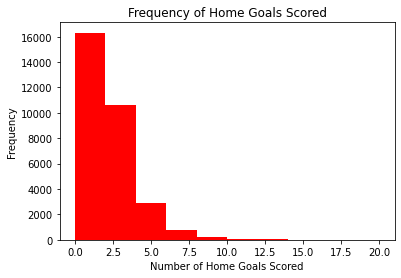

In [60]:
# Plotting the histogram
plt.hist(combined_dataset['home_score'], bins= [0,2,4,6,8,10,12,14,16,18,20], rwidth = 3, color ='red')

# Labelling our x axis
plt.xlabel("Number of Home Goals Scored")

# Labelling our y axis
plt.ylabel("Frequency")

# Giving a title to our Bar chart
plt.title("Frequency of Home Goals Scored")

# Displaying our chart
plt.show()

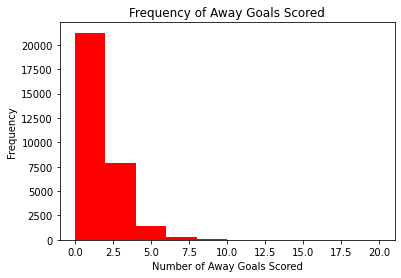

In [61]:
# Plotting the histogram
plt.hist(combined_dataset['away_score'], bins= [0,2,4,6,8,10,12,14,16,18,20], rwidth = 3, color = 'red')

# Labelling our x axis
plt.xlabel("Number of Away Goals Scored")

# Labelling our y axis
plt.ylabel("Frequency")

# Giving a title to our Bar chart
plt.title("Frequency of Away Goals Scored")

# Displaying our chart
plt.show()

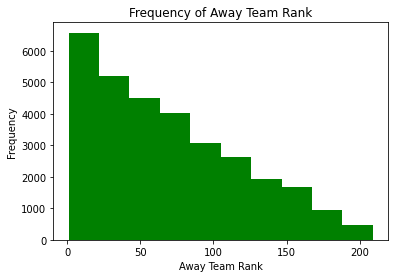

In [62]:
# Plotting the histogram
plt.hist(combined_dataset['away_team_rank'], bins= 10, rwidth = 3, color ='green')

# Labelling our x axis
plt.xlabel("Away Team Rank")

# Labelling our y axis
plt.ylabel("Frequency")

# Giving a title to our Bar chart
plt.title("Frequency of Away Team Rank")

# Displaying our chart
plt.show()

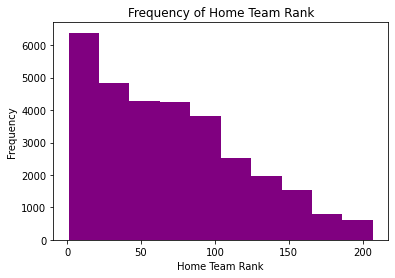

In [63]:
# Plotting the histogram
plt.hist(combined_dataset['home_team_rank'], bins= 10, rwidth = 3, color ='purple')

# Labelling our x axis
plt.xlabel("Home Team Rank")

# Labelling our y axis
plt.ylabel("Frequency")

# Giving a title to our Bar chart
plt.title("Frequency of Home Team Rank")

# Displaying our chart
plt.show()

In [64]:
combined_dataset.head(2)

,date,home_score,away_score,away_team_rank,home_team_rank,Friendly,Other,World Cup
0,1872-11-30,0,0,11.0,30.0,1,0,0
1,1873-03-08,4,2,30.0,11.0,1,0,0


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn

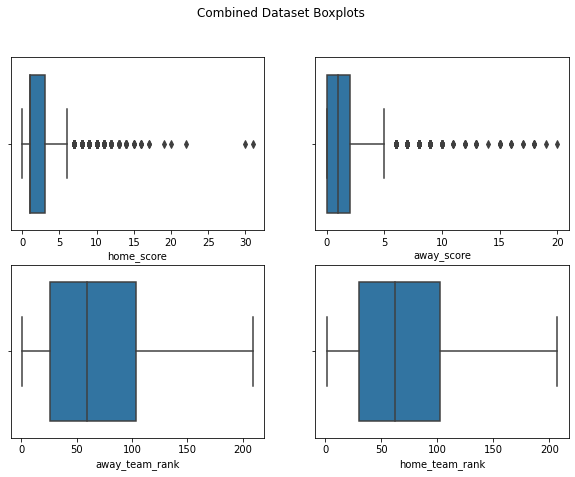

In [65]:
# Checking for Outliers
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(10, 7))
fig.suptitle('Combined Dataset Boxplots') # Gives the title of the boxplots
sns.boxplot(combined_dataset['home_score'], ax=ax1)
sns.boxplot(combined_dataset['away_score'], ax=ax2)
sns.boxplot(combined_dataset['away_team_rank'], ax=ax3)
sns.boxplot(combined_dataset['home_team_rank'], ax=ax4)
plt.show()

In [66]:
# Measures of central tendency

# Finding the mean
(print('MEASURES OF CENTRAL TENDENCY:'))
print('Home Team Score Mean:', round(combined_dataset["home_score"].mean()))
print('Away Team Score Mean:', round(combined_dataset["away_score"].mean()))
print('*'*70)
print('Home Team Score Median:', round(combined_dataset["home_score"].median()))
print('Away Team Score Median:', round(combined_dataset["away_score"].median()))
print('*'*70)
print('Home Team Score Mode:', round(combined_dataset["home_score"].mode()))
print('Away Team Score Mode:', round(combined_dataset["away_score"].mode()))
print('*'*70)
(print('MEASURES OF DISPERSION:'))
print('Home Team Score Standard Deviation:', round(combined_dataset["home_score"].std()))
print('Away Team Score Standard Deviation:', round(combined_dataset["away_score"].std()))
print('*'*70)
print('Home Team Score Quantiles:', round(combined_dataset["home_score"].quantile([0.25, 0.5, 0.75])))
print('Away Team Score Quantiles:', round(combined_dataset["away_score"].quantile([0.25, 0.5, 0.75])))

MEASURES OF CENTRAL TENDENCY:
Home Team Score Mean: 2
Away Team Score Mean: 1
**********************************************************************
Home Team Score Median: 1
Away Team Score Median: 1
**********************************************************************
Home Team Score Mode: 0    1
dtype: int64
Away Team Score Mode: 0    0
dtype: int64
**********************************************************************
MEASURES OF DISPERSION:
Home Team Score Standard Deviation: 2
Away Team Score Standard Deviation: 1
**********************************************************************
Home Team Score Quantiles: 0.25    1.0
0.50    1.0
0.75    3.0
Name: home_score, dtype: float64
Away Team Score Quantiles: 0.25    0.0
0.50    1.0
0.75    2.0
Name: away_score, dtype: float64


There are a few outlier high scoring matches. However, they are few in number and thus won't be removed from the dataset football matches can have such rare occurences as the article below shows. The outlier of 36 is therefore in order and won't be deleted:

*(https://www.theguardian.com/football/2002/nov/01/newsstory.sport5#:~:text=The%20world%20record%20for%20goals,by%20a%20team%20from%20Madagascar.: The world record for goals scored in senior football, which has stood steadfast ever since Arbroath thumped Bon Accord 36-0 in 1885, has been smashed by a team from Madagascar. Farcical scenes quicky led to a basketball score as league champions AS Adema won a match 149-0, more than quadrupling the existing record - and without gaining possession between the first goal and the 149th. Their opponents, Stade Olymique L'Emyrne, took complete control of the national league game, reducing Adema to the role of onlookers, as they deliberately plonked the ball in the back of their own net 149 times, in protest over a refereeing decision)*



Home teams are also normally expected to score more goals, and this is clearly seen in their score having a greater mean(twice that of away teams). The standard deviation of home team scores is also greater than that of away teams, signifying greater risk.

# 4. Perform Bivariate Analysis

In [67]:
combined_dataset.head(2) # preview the data

,date,home_score,away_score,away_team_rank,home_team_rank,Friendly,Other,World Cup
0,1872-11-30,0,0,11.0,30.0,1,0,0
1,1873-03-08,4,2,30.0,11.0,1,0,0


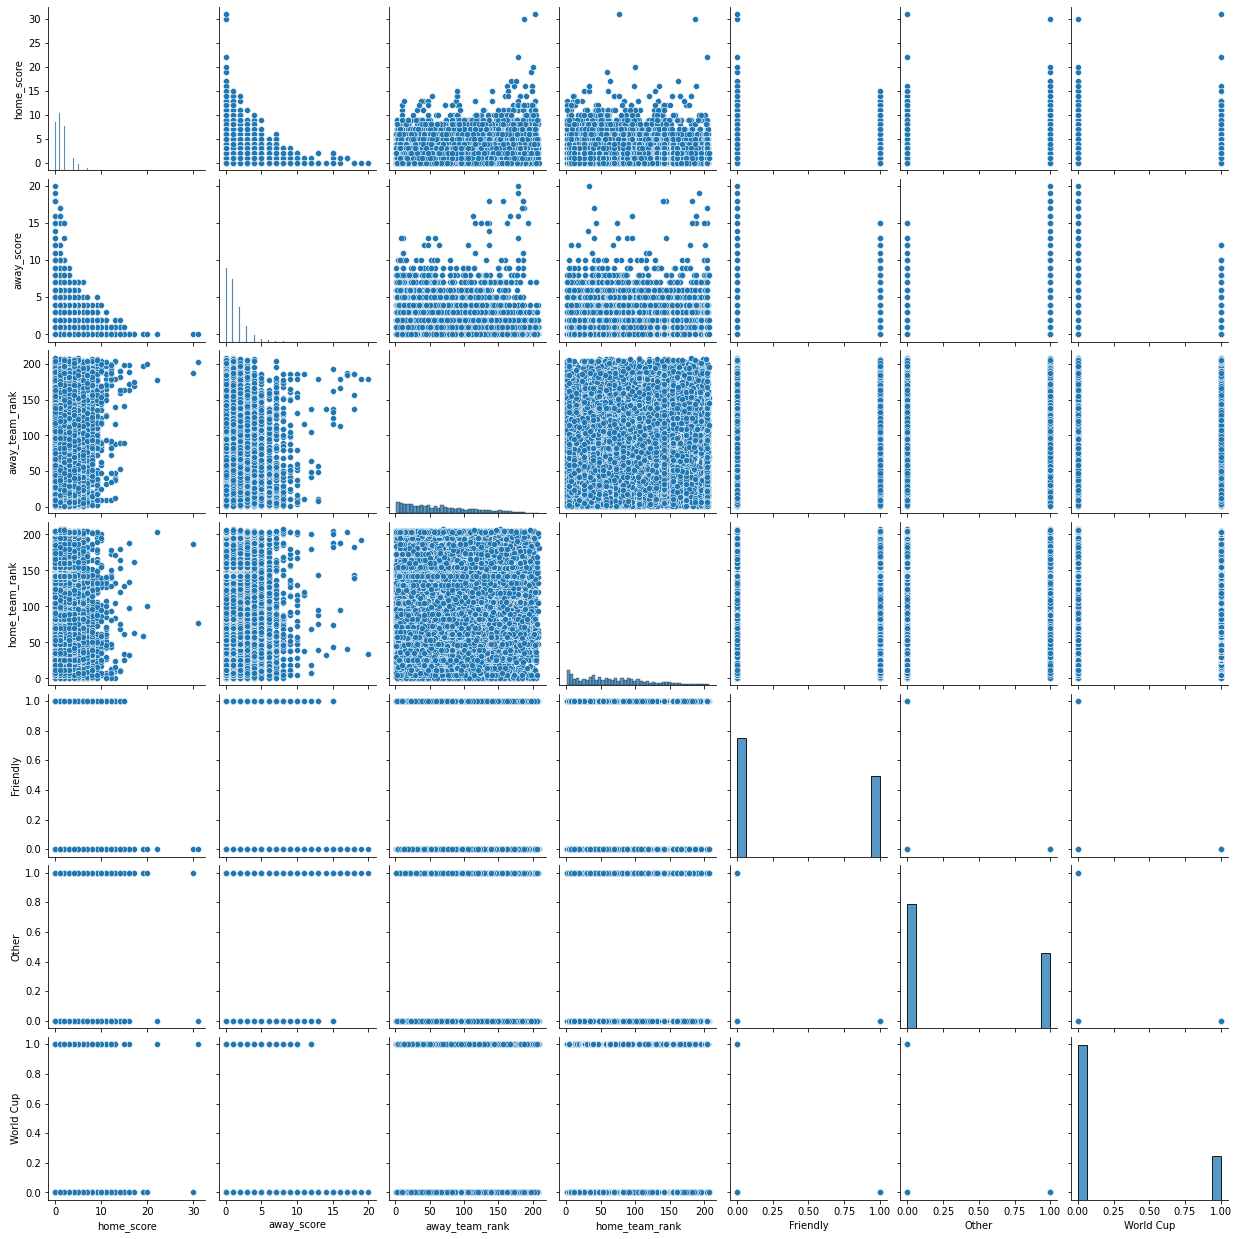

In [68]:
# plot pairplots

sns.pairplot(combined_dataset)

plt.show()


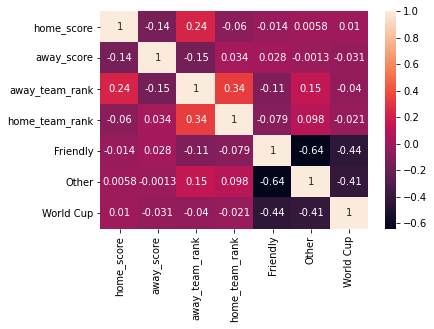

In [70]:
# plot a correlation matrix

sns.heatmap(combined_dataset.corr(), annot=True)
plt.show()

The dataset shows weak correlations between the variables.

# 5. Polynomial Regression

## a) Model 1: Predict the home team scores given the home team rank

In [175]:
# import libraries

from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split

# Import LinearRegression method from sklearn linear_model library
from sklearn.linear_model import LinearRegression

In [176]:
# preview the dataset

combined_dataset.head(2)

,date,home_score,away_score,away_team_rank,home_team_rank,Friendly,Other,World Cup
0,1872-11-30,0,0,11.0,30.0,1,0,0
1,1873-03-08,4,2,30.0,11.0,1,0,0


In [177]:
# To perform polynomial regression, group the dataset and create a new dataframe with the mean of the columns as the
# numerical data that is held in the columns. This is because there have been many rankings done over the years and predicting using each of these
# individual rankings would be difficult. We thus summarize the data so as to enable regression.

# NB: (At the end of the polynomial regression exercise I show the scatter plot of using each of the individual observations, showing why it would be difficult
# to predict using these individual observations)

poly_reg_dataset =  combined_dataset.groupby(['home_team_rank']).mean()

poly_reg_dataset.head(2)

,home_score,away_score,away_team_rank,Friendly,Other,World Cup
home_team_rank,,,,,,
1.0,1.980519,1.069805,51.102273,0.444805,0.310065,0.245130
2.0,2.111465,0.974522,43.780255,0.496815,0.289809,0.213376


In [178]:
# specify the independent and dependent variables

X = poly_reg_dataset.index.values.reshape(-1, 1)

y = poly_reg_dataset['home_score'].values.reshape(-1, 1)

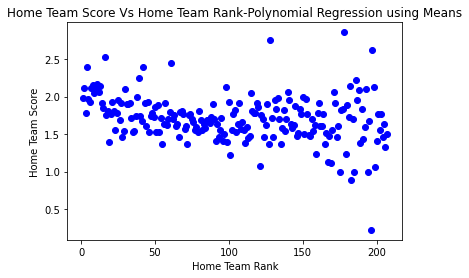

In [179]:
# Visualizing the dataset by plotting a scatter plot

plt.scatter(X, y, color='blue') 
plt.title('Home Team Score Vs Home Team Rank-Polynomial Regression using Means')
plt.xlabel('Home Team Rank')
plt.ylabel('Home Team Score')
plt.show()

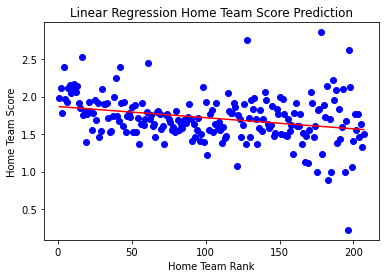

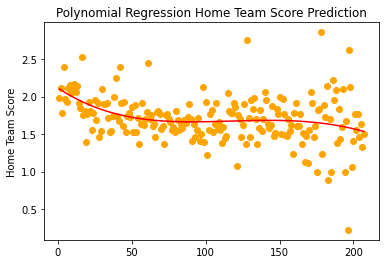

In [184]:
# Split the dataset into train and test sets
X_train, Y_train, X_test, Y_test = train_test_split(X,y, test_size = 0.2, random_state=0)


# Fit Linear Regression model to the dataset(optional to compare the linear regression model to the polynomial regression model)
reg_line = LinearRegression()
reg_line.fit(X,y)

# Visualize the Linear Regression results
plt.scatter(X, y, color='blue') # You can put any color you like. This just helps us highlight the data points
plt.plot(X, reg_line.predict(X), color='red')
plt.title('Linear Regression Home Team Score Prediction')
plt.xlabel('Home Team Rank')
plt.ylabel('Home Team Score')
plt.show()

# Fit polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree = 4) 
X_poly = poly_reg.fit_transform(X)


pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)


#Visualize the Polynomial Regression results
plt.scatter(X, y, color='orange') # To help highlight the data points
plt.plot(X, pol_reg.predict(X_poly), color='red')
plt.title('Polynomial Regression Home Team Score Prediction')
plt.ylabel('Home Team Score')
plt.show()


I have used 4 degrees of freedom as anything higher doesnt seem to give a better model

In [187]:
# Use the polynomial equation above to predict the score of the home team given that the home team is ranked position number 6
# and number 50 respectively

home_team_position = 6
lin_pred = reg_line.predict([[home_team_position]])
print('Linear prediction: %d' %lin_pred)

# Predict using Polynomial Regression
poly_pred = pol_reg.predict(poly_reg.fit_transform([[home_team_position]]))
print('Polynomial prediction: %d' %poly_pred)

print('*'*70)

home_team_position = 50
lin_pred = reg_line.predict([[home_team_position]])
print('Linear prediction: %d' %lin_pred)

# Predict using Polynomial Regression
poly_pred = pol_reg.predict(poly_reg.fit_transform([[home_team_position]]))
print('Polynomial prediction: %d' %poly_pred)


Linear prediction: 1
Polynomial prediction: 2
**********************************************************************
Linear prediction: 1
Polynomial prediction: 1


In [168]:
combined_dataset.head(2)

,date,home_score,away_score,away_team_rank,home_team_rank,Friendly,Other,World Cup
0,1872-11-30,0,0,11.0,30.0,1,0,0
1,1873-03-08,4,2,30.0,11.0,1,0,0


        date  home_score  away_score  ...  Friendly  Other  World Cup
0 1872-11-30           0           0  ...         1      0          0
1 1873-03-08           4           2  ...         1      0          0

[2 rows x 8 columns]


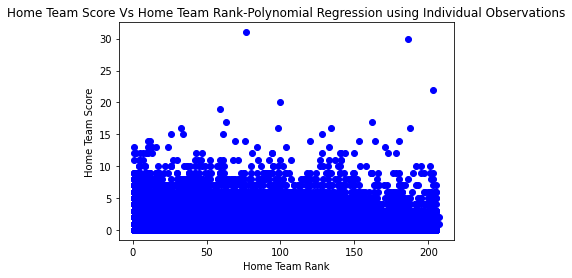

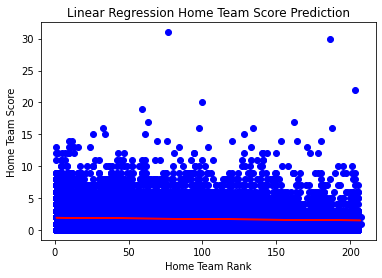

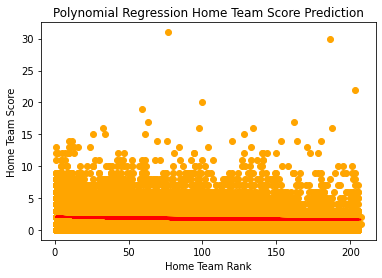

In [188]:
# This section provides a scatter plot using the individual observations and shows why it would be difficult to predict using these
# indivisual observations

print(combined_dataset.head(2))

X = combined_dataset.home_team_rank.values.reshape(-1, 1)

y = combined_dataset['home_score'].values.reshape(-1, 1)

# Visualizing the dataset by plotting a scatter plot

plt.scatter(X, y, color='blue') 
plt.title('Home Team Score Vs Home Team Rank-Polynomial Regression using Individual Observations')
plt.xlabel('Home Team Rank')
plt.ylabel('Home Team Score')
plt.show()

# Split the dataset into train and test sets
X_train, Y_train, X_test, Y_test = train_test_split(X,y, test_size = 0.2, random_state=0)


# Fit Linear Regression model to the dataset(optional to compare the linear regression model to the polynomial regression model)
reg_line = LinearRegression()
reg_line.fit(X,y)

# Visualize the Linear Regression results
plt.scatter(X, y, color='blue') # You can put any color you like. This just helps us highlight the data points
plt.plot(X, reg_line.predict(X), color='red')
plt.title('Linear Regression Home Team Score Prediction')
plt.xlabel('Home Team Rank')
plt.ylabel('Home Team Score')
plt.show()

# Fit polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree = 4) 
X_poly = poly_reg.fit_transform(X)


pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

#Visualize the Polynomial Regression results
plt.scatter(X, y, color='orange') # To help highlight the data points
plt.plot(X, pol_reg.predict(X_poly), color='red')
plt.title('Polynomial Regression Home Team Score Prediction')
plt.xlabel('Home Team Rank')
plt.ylabel('Home Team Score')
plt.show()

As can be seen from the graphs above, predicting using the individual observations does not give a very good model. As such, I resolved to using the means so as to go around this problem

## b) Model 2: Predict the away team scores given the away team rank

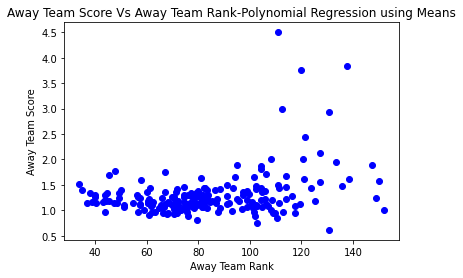

In [193]:
# specify the independent and dependent variables

X = poly_reg_dataset.away_team_rank.values.reshape(-1, 1)

y = poly_reg_dataset['away_score'].values.reshape(-1, 1)

# Visualizing the dataset by plotting a scatter plot

plt.scatter(X, y, color='blue') 
plt.title('Away Team Score Vs Away Team Rank-Polynomial Regression using Means')
plt.xlabel('Away Team Rank')
plt.ylabel('Away Team Score')
plt.show()

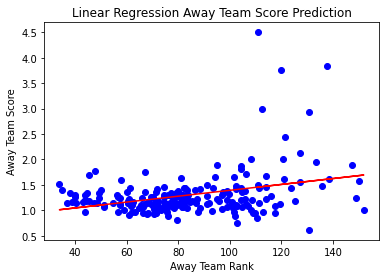

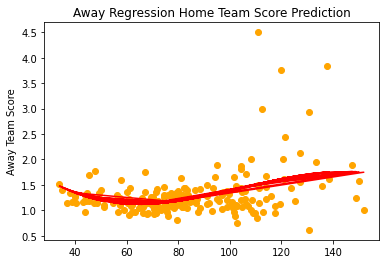

In [201]:
# Split the dataset into train and test sets
X_train, Y_train, X_test, Y_test = train_test_split(X,y, test_size = 0.2, random_state=0)


# Fit Linear Regression model to the dataset(optional to compare the linear regression model to the polynomial regression model)
reg_line = LinearRegression()
reg_line.fit(X,y)

# Visualize the Linear Regression results
plt.scatter(X, y, color='blue') # You can put any color you like. This just helps us highlight the data points
plt.plot(X, reg_line.predict(X), color='red')
plt.title('Linear Regression Away Team Score Prediction')
plt.xlabel('Away Team Rank')
plt.ylabel('Away Team Score')
plt.show()

# Fit polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree = 3) 
X_poly = poly_reg.fit_transform(X)


pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)


#Visualize the Polynomial Regression results
plt.scatter(X, y, color='orange') # To help highlight the data points
plt.plot(X, pol_reg.predict(X_poly), color='red')
plt.title('Away Regression Home Team Score Prediction')
plt.ylabel('Away Team Score')
plt.show()

In [204]:
# Use the polynomial equation above to predict the score of the home team given that the home team is ranked position number 6
# and number 50 respectively

away_team_position = 6
lin_pred = reg_line.predict([[away_team_position]])
print('Linear prediction: %d' %lin_pred)

# Predict using Polynomial Regression
poly_pred = pol_reg.predict(poly_reg.fit_transform([[away_team_position]]))
print('Polynomial prediction: %d' %poly_pred)

print('*'*70)

away_team_position = 50
lin_pred = reg_line.predict([[away_team_position]])
print('Linear prediction: %d' %lin_pred)

# Predict using Polynomial Regression
poly_pred = pol_reg.predict(poly_reg.fit_transform([[away_team_position]]))
print('Polynomial prediction: %d' %poly_pred)

Linear prediction: 0
Polynomial prediction: 2
**********************************************************************
Linear prediction: 1
Polynomial prediction: 1


In [ ]:
# Splitting our dataset
#
X = titanic_dmy.drop("Survived",axis=1)
y = titanic_dmy["Survived"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)